#### 使用SVR对boston数据集进行回归，画出回归图像


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
from sklearn.datasets import load_boston

In [83]:
boston = load_boston()
data = boston['data']
target = boston['target']
feature_names = boston['feature_names']

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [84]:
data.shape

(506, 13)

In [85]:
target.shape

(506,)

In [68]:
df=pd.DataFrame(data,columns=feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


拆分数据集

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2)

使用SVR

In [58]:
from sklearn.svm import SVR

In [40]:
svr = SVR(kernel='linear',C=10)
svr.fit(x_train,y_train)

SVR(C=10, kernel='linear')

In [59]:
svr.score(x_train,y_train)

0.6971628917163102

In [60]:
svr.score(x_test,y_test)

0.7018943658369963

研究每个特征对结果的关系

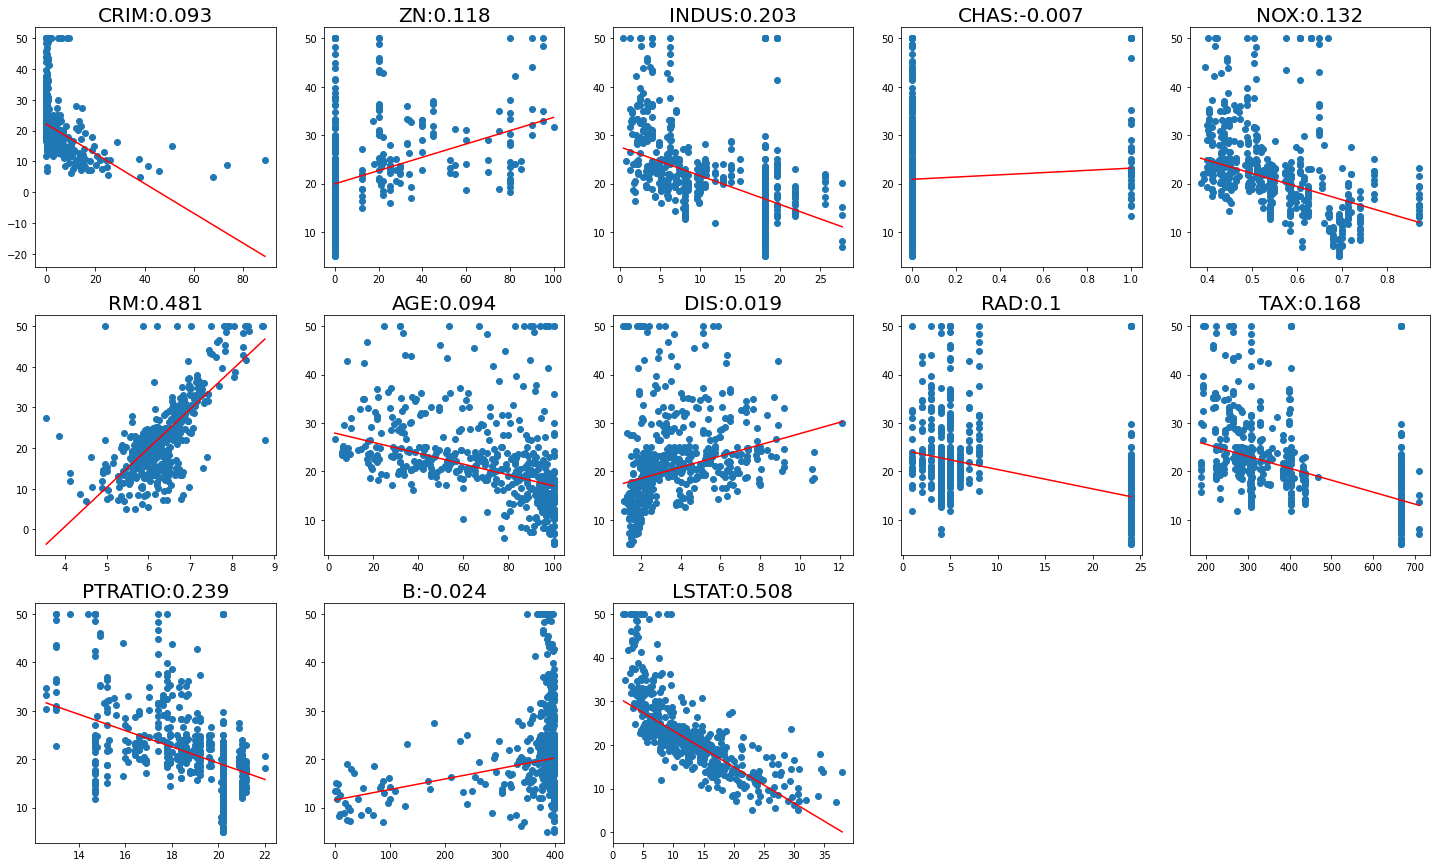

In [76]:
# 画图
# 3行5列
plt.figure(figsize=(5*5,3*5))
for i,col in enumerate(df.columns):
    data = df[col].copy()
#     子图
    axes = plt.subplot(3,5,i+1)
    axes.scatter(data,target)
    svr.fit(df[[col]],target)
    w=svr.coef_[0]
    b=svr.intercept_
    x=np.linspace(data.min(),data.max(),10)
    y=w*x+b
    axes.plot(x,y,c='r')
    score=svr.score(df[[col]],target)
    axes.set_title(f'{col}:{np.round(score,3)}',fontdict={'fontsize': 20})
    

 - RM，LSTAT对预测结果的影响较大